In [11]:
import os
from pathlib import Path
import torch
import matplotlib.pyplot as plt
from diffusion.model import Model

In [12]:
MODEL_PATH = Path("../model")

In [13]:
model = Model()
model.load_state_dict(torch.load(MODEL_PATH.joinpath(os.listdir(MODEL_PATH, )[-1])))

<All keys matched successfully>

In [14]:
img = model.infer((32, 32))

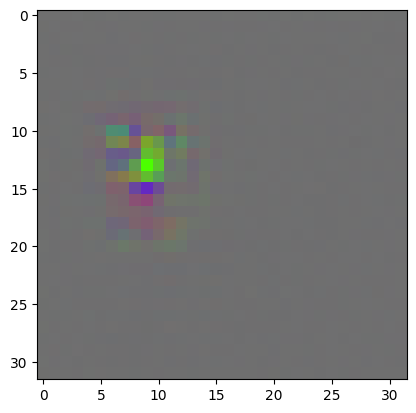

In [15]:
plt.imshow(img)